___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Градиентный бустинг и поиск по сетке (GridSearch)


## Данные

<img src="mushroom.jpg" width="400" height="400">

### Идём за грибами: съедобный гриб или ядовитый?

Источник данных: https://archive.ics.uci.edu/ml/datasets/Mushroom


Эти данные содержат описание гипотетических примеров для 23 видов грибов из семейства шампиньоновых (стр. 500-525). Каждый вид характеризуется либо как съедобный, либо как ядовитый, либо неизвестной съедобности (не рекомендуется в пищу). Этот последний класс был объединён с классом ядовитых. Источник явно пишет, что не существует простого правила для определения съедобности гриба.


Информация об атрибутах:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Подготовка данных

In [4]:
X = df.drop('class',axis=1)

In [5]:
y = df['class']

In [6]:
X = pd.get_dummies(X,drop_first=True)

In [7]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Разбиение на обучающий и тестовый наборы данных - Train Test Split 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Градиентный бустинг и поиск по сетке с кросс-валидацией

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='deprecated', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [15]:
gb_model = GradientBoostingClassifier()

In [16]:
grid = GridSearchCV(gb_model,param_grid)

### Обучение на обучающих данных с помощью GridSearchCV

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [18]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

## Оценка работы модели 

In [19]:
from sklearn.metrics import classification_report,accuracy_score

In [20]:
predictions = grid.predict(X_test)

In [21]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [23]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 3.86583977e-16, 0.00000000e+00, 0.00000000e+00,
       9.14861920e-17, 1.05030313e-03, 9.82716489e-18, 2.56553350e-17,
       4.77794515e-19, 9.70869064e-18, 9.16416924e-18, 0.00000000e+00,
       4.49629761e-17, 1.73743460e-21, 0.00000000e+00, 2.22085608e-08,
       2.42084559e-03, 5.20995962e-02, 6.24175887e-04, 1.39360201e-02,
       1.82499853e-02, 1.51256909e-05, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.29416465e-02,
       1.05984893e-02, 0.00000000e+00, 2.15852782e-16, 0.00000000e+00,
       3.10077605e-17, 3.77682125e-17, 0.00000000e+00, 0.00000000e+00,
       4.73546605e-17, 0.00000000e+00, 9.26749964e-18, 1.24358525e-17,
       2.92091629e-04, 8.20422386e-05, 1.35970145e-01, 4.69032068e-03,
       2.23477786e-02, 4.47043435e-04, 6.65932824e-06, 4.95063766e-06,
       0.00000000e+00, 0.00000000e+00, 4.89678954e-02, 5.43634987e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [24]:
feat_import = grid.best_estimator_.feature_importances_

In [25]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [26]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,3.865840e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.148619e-17
...,...
habitat_l,0.000000e+00
habitat_m,1.144247e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [27]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.052100
stalk-surface-below-ring_y,0.048968
spore-print-color_r,0.030495
...,...
odor_y,0.000000
odor_s,0.000000
stalk-color-above-ring_g,0.000000
cap-color_u,0.000000


In [28]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.06469,0.0,0.0,3.865840e-16,0.000499,0.614744


In [29]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [30]:
imp_feats.sort_values('Importance')

,Importance
population_y,0.000550
odor_c,0.000624
ring-number_t,0.000680
cap-surface_g,0.001050
spore-print-color_w,0.001302
population_c,0.001387
cap-color_y,0.002421
stalk-color-below-ring_w,0.002541
stalk-color-below-ring_y,0.003023
ring-type_p,0.003322


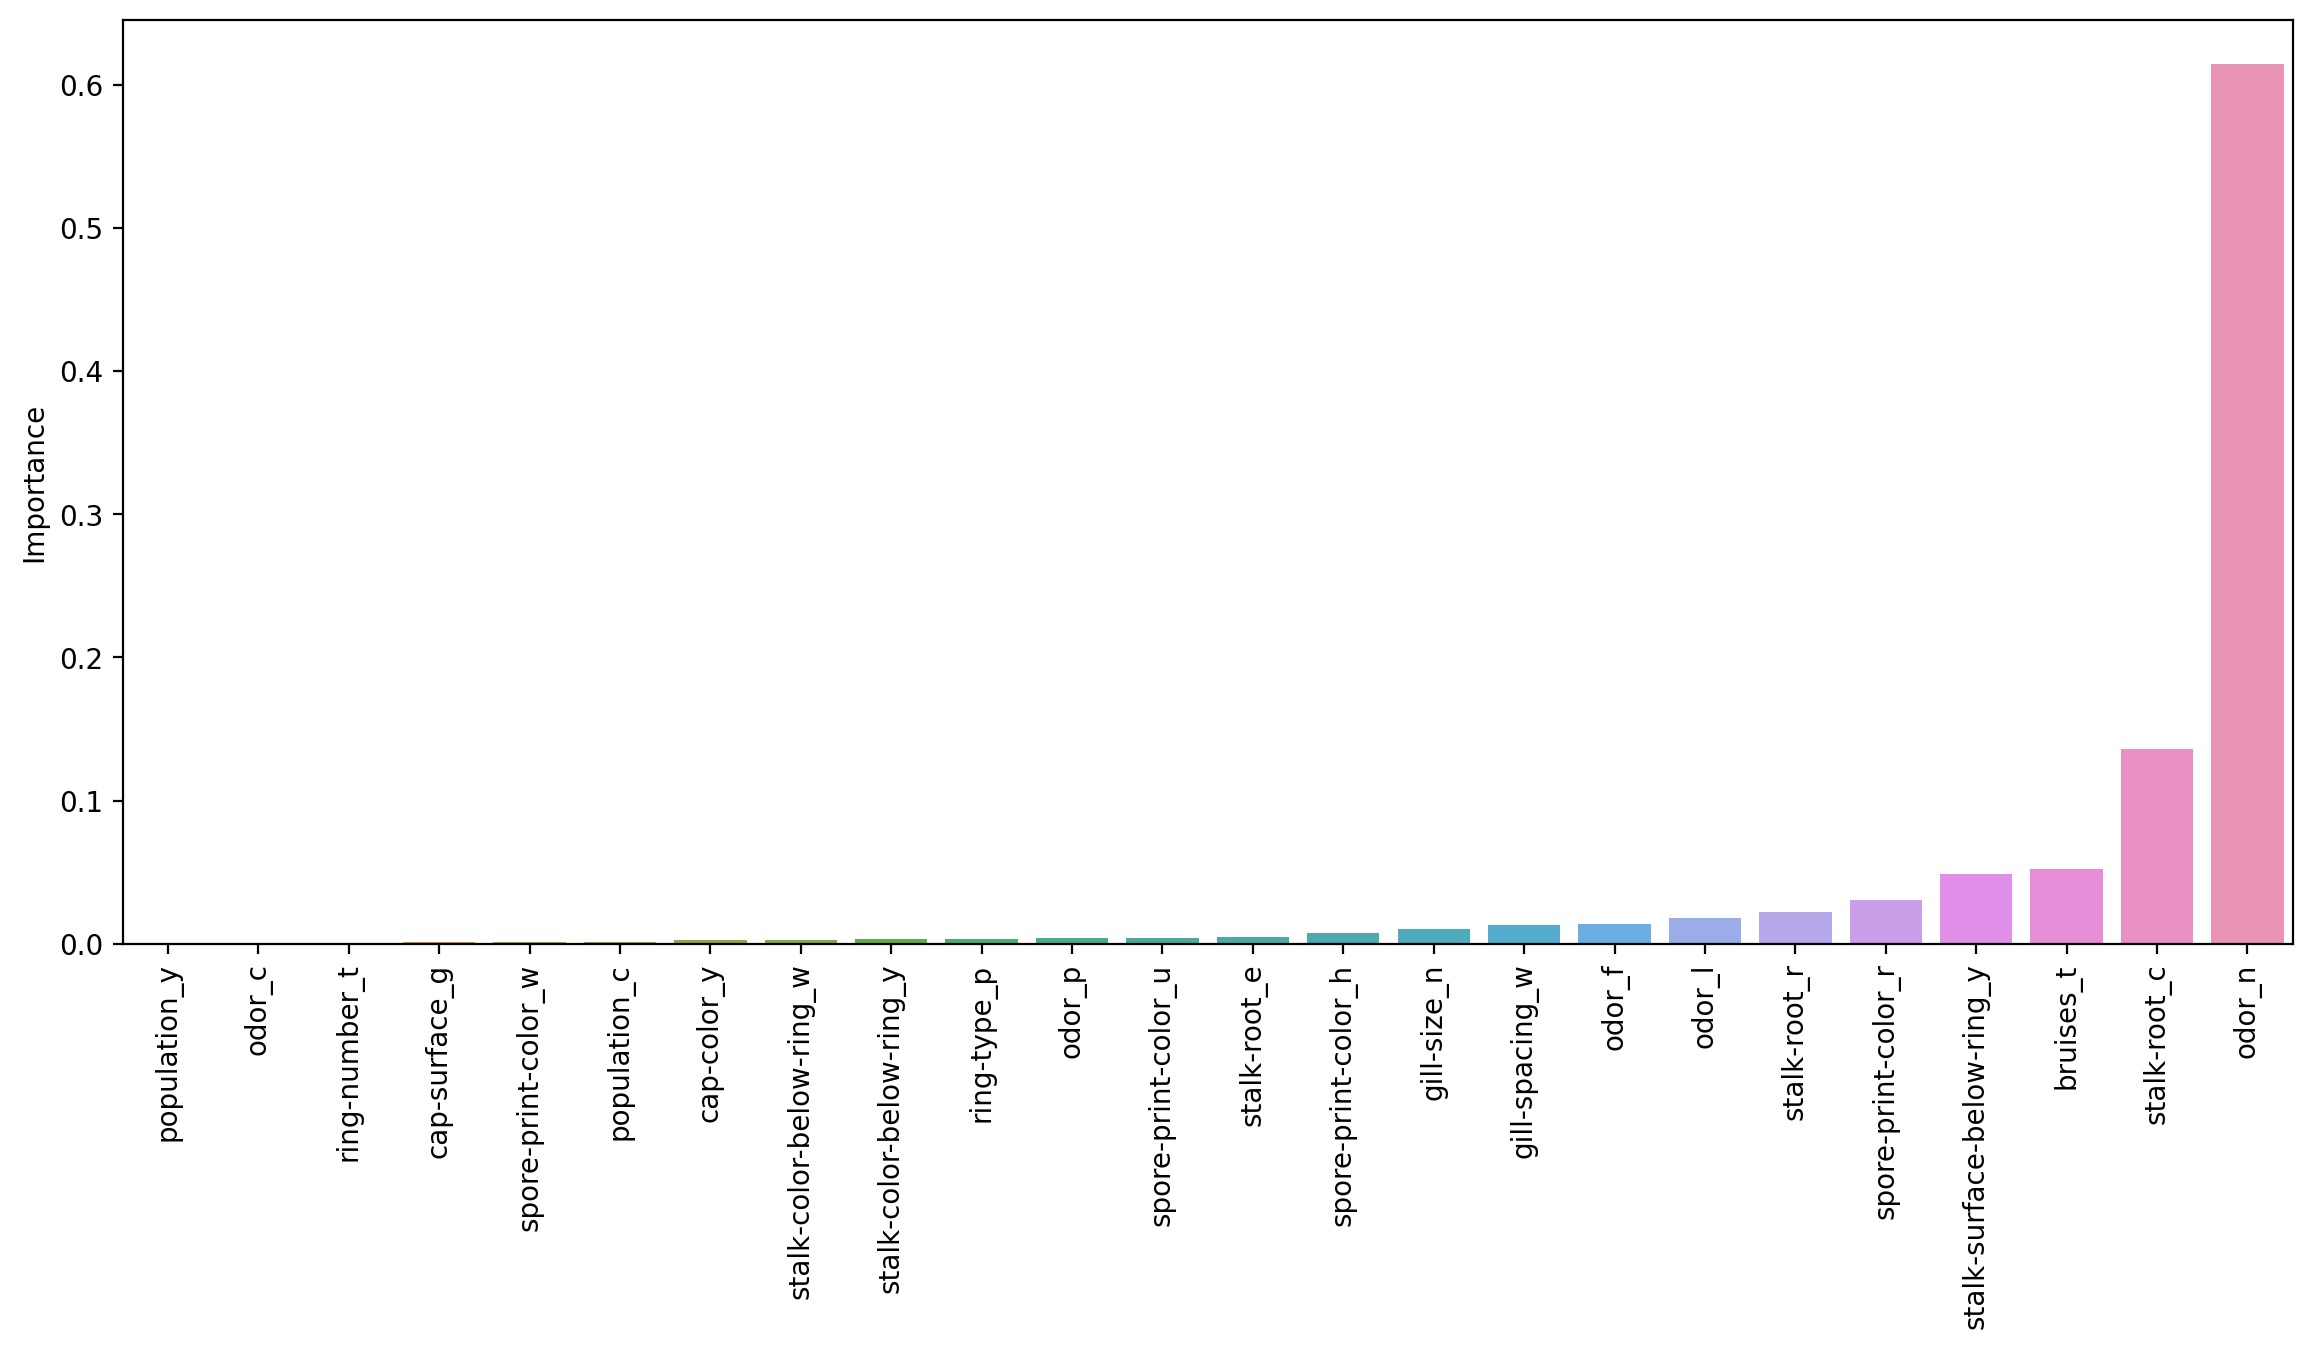

In [31]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);